In [1]:
from sage.misc.html import latex
%display latex

In [2]:
var("z epsilon tau")

(z, epsilon, tau)

In [3]:
ep = epsilon
t = tau
ep

epsilon

In [4]:
rhs = -1/(1 + ep * z)**2
rhs

-1/(epsilon*z + 1)^2

In [5]:
rhs_taylor = rhs.taylor(ep, 0, 4)
latex(rhs_taylor)

-5 \, \epsilon^{4} z^{4} + 4 \, \epsilon^{3} z^{3} - 3 \, \epsilon^{2} z^{2} + 2 \, \epsilon z - 1

In [6]:
z_expanded = 0
for i in range(5):
    z_expanded += function(f"z{i}")(t) * ep**i
z_expanded

epsilon^4*z4(tau) + epsilon^3*z3(tau) + epsilon^2*z2(tau) + epsilon*z1(tau) + z0(tau)

In [7]:
rhs_expanded = rhs_taylor.substitute(z=z_expanded).expand().collect(ep)

In [8]:
lhs = 0
for i in range(5):
    lhs += derivative(function(f"z{i}")(t), t, 2) * ep**i
lhs

epsilon^4*diff(z4(tau), tau, tau) + epsilon^3*diff(z3(tau), tau, tau) + epsilon^2*diff(z2(tau), tau, tau) + epsilon*diff(z1(tau), tau, tau) + diff(z0(tau), tau, tau)

In [9]:
equations = (rhs_expanded - lhs).collect(ep).coefficients(ep, sparse=False)[:6]
[e == 0 for e in equations]

[-diff(z0(tau), tau, tau) - 1 == 0,
 2*z0(tau) - diff(z1(tau), tau, tau) == 0,
 -3*z0(tau)^2 + 2*z1(tau) - diff(z2(tau), tau, tau) == 0,
 4*z0(tau)^3 - 6*z0(tau)*z1(tau) + 2*z2(tau) - diff(z3(tau), tau, tau) == 0,
 -5*z0(tau)^4 + 12*z0(tau)^2*z1(tau) - 3*z1(tau)^2 - 6*z0(tau)*z2(tau) + 2*z3(tau) - diff(z4(tau), tau, tau) == 0,
 -20*z0(tau)^3*z1(tau) + 12*z0(tau)*z1(tau)^2 + 12*z0(tau)^2*z2(tau) - 6*z1(tau)*z2(tau) - 6*z0(tau)*z3(tau) + 2*z4(tau) == 0]

In [71]:
i = 0

eqn = integrate(equations[i] == 0, t)
eqn = eqn - eqn.left().operands()[0]
eqn *= -1
eqn

diff(z0(tau), tau) == -c20 - tau

In [72]:
term_at_t0 = eqn.right().substitute(t==0)
constant = solve(term_at_t0 == 1, term_at_t0.variables()[0])
constant

[c20 == -1]

In [73]:
eqn = eqn.substitute(constant)

In [74]:
eqn = integrate(eqn, t)
eqn

z0(tau) == -1/2*tau^2 + c21 + tau

In [75]:
term_at_t0 = eqn.right().substitute(t==0)
constant = solve(term_at_t0 == 0, term_at_t0.variables()[0])
constant

[c21 == 0]

In [76]:
eqn = eqn.substitute(constant)
eqn

z0(tau) == -1/2*tau^2 + tau

In [118]:
eqns = [None for _ in range(5)]
eqns[0] = eqn

In [119]:
def solve_fn(eqn, function):
    eqn = eqn.substitute({function: var("tempy")})
    eqn = eqn.solve(var("tempy"))[0]
    eqn = eqn.substitute({var("tempy"):function})
    return eqn

In [120]:
for i in range(1, 5):

    eqns[i] = integrate(equations[i] == 0, t)
    eqns[i].show()
    for j in range(i):
        eqns[i] = eqns[i].substitute({eqns[j].left():eqns[j].right()})
    eqns[i].show()

    subterm = (eqns[i].substitute({derivative(function(f"z{i}")(t), t):var("dzidt")}).solve(dzidt)[0].right() == 0).substitute(t==0)

    subterm.show()

    subterm = subterm.solve(subterm.variables()[0])[0]

    subterm.show()

    eqns[i] = eqns[i].substitute(subterm)

    eqns[i] = integrate(eqns[i], t)
    eqns[i].show()

    eqns[i] = solve_fn(eqns[i], function(f"z{i}")(t))
    eqns[i].show()

    subterm = (eqns[i].right().substitute(t==0)==0)
    subterm = subterm.solve(subterm.variables()[0])[0]
    subterm.show()

    eqns[i] = eqns[i].substitute(subterm)
    
    eqns[i].show()

eqns

integrate(2*z0(tau) - diff(z1(tau), tau, tau), tau) == c90

-1/3*tau^3 + tau^2 - diff(z1(tau), tau) == c90

-c90 == 0

c90 == 0

-1/12*tau^4 + 1/3*tau^3 - z1(tau) == c91

z1(tau) == -1/12*tau^4 + 1/3*tau^3 - c91

c91 == 0

z1(tau) == -1/12*tau^4 + 1/3*tau^3

integrate(-3*z0(tau)^2 + 2*z1(tau) - diff(z2(tau), tau, tau), tau) == c92

-11/60*tau^5 + 11/12*tau^4 - tau^3 - diff(z2(tau), tau) == c92

-c92 == 0

c92 == 0

-11/360*tau^6 + 11/60*tau^5 - 1/4*tau^4 - z2(tau) == c93

z2(tau) == -11/360*tau^6 + 11/60*tau^5 - 1/4*tau^4 - c93

c93 == 0

z2(tau) == -11/360*tau^6 + 11/60*tau^5 - 1/4*tau^4

integrate(4*z0(tau)^3 - 6*z0(tau)*z1(tau) + 2*z2(tau) - diff(z3(tau), tau, tau), tau) == c94

-73/630*tau^7 + 73/90*tau^6 - 17/10*tau^5 + tau^4 - diff(z3(tau), tau) == c94

-c94 == 0

c94 == 0

-73/5040*tau^8 + 73/630*tau^7 - 17/60*tau^6 + 1/5*tau^5 - z3(tau) == c95

z3(tau) == -73/5040*tau^8 + 73/630*tau^7 - 17/60*tau^6 + 1/5*tau^5 - c95

c95 == 0

z3(tau) == -73/5040*tau^8 + 73/630*tau^7 - 17/60*tau^6 + 1/5*tau^5

integrate(-5*z0(tau)^4 + 12*z0(tau)^2*z1(tau) - 3*z1(tau)^2 - 6*z0(tau)*z2(tau) + 2*z3(tau) - diff(z4(tau), tau, tau), tau) == c96

-887/11340*tau^9 + 887/1260*tau^8 - 61/28*tau^7 + 53/20*tau^6 - tau^5 - diff(z4(tau), tau) == c96

-c96 == 0

c96 == 0

-887/113400*tau^10 + 887/11340*tau^9 - 61/224*tau^8 + 53/140*tau^7 - 1/6*tau^6 - z4(tau) == c97

z4(tau) == -887/113400*tau^10 + 887/11340*tau^9 - 61/224*tau^8 + 53/140*tau^7 - 1/6*tau^6 - c97

c97 == 0

z4(tau) == -887/113400*tau^10 + 887/11340*tau^9 - 61/224*tau^8 + 53/140*tau^7 - 1/6*tau^6

[z0(tau) == -1/2*tau^2 + tau,
 z1(tau) == -1/12*tau^4 + 1/3*tau^3,
 z2(tau) == -11/360*tau^6 + 11/60*tau^5 - 1/4*tau^4,
 z3(tau) == -73/5040*tau^8 + 73/630*tau^7 - 17/60*tau^6 + 1/5*tau^5,
 z4(tau) == -887/113400*tau^10 + 887/11340*tau^9 - 61/224*tau^8 + 53/140*tau^7 - 1/6*tau^6]

In [121]:
z_series = sum(eqns[i].right() * ep **i for i in range(5))

z_series

-1/453600*(3548*tau^10 - 35480*tau^9 + 123525*tau^8 - 171720*tau^7 + 75600*tau^6)*epsilon^4 - 1/5040*(73*tau^8 - 584*tau^7 + 1428*tau^6 - 1008*tau^5)*epsilon^3 - 1/360*(11*tau^6 - 66*tau^5 + 90*tau^4)*epsilon^2 - 1/12*(tau^4 - 4*tau^3)*epsilon - 1/2*tau^2 + tau

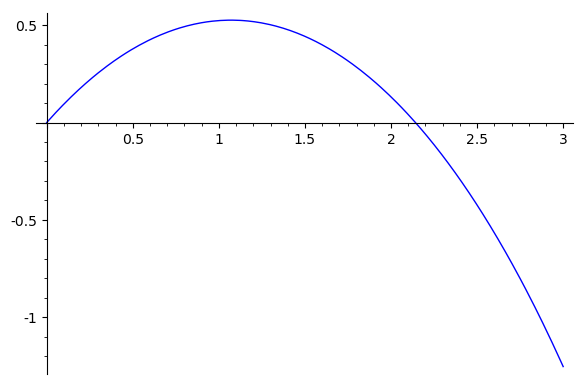

In [131]:
plot(z_series.substitute(ep==.1), t, 0, 3)

In [132]:
velocity = derivative(z_series, t)

velocity

-1/11340*(887*tau^9 - 7983*tau^8 + 24705*tau^7 - 30051*tau^6 + 11340*tau^5)*epsilon^4 - 1/630*(73*tau^7 - 511*tau^6 + 1071*tau^5 - 630*tau^4)*epsilon^3 - 1/60*(11*tau^5 - 55*tau^4 + 60*tau^3)*epsilon^2 - 1/3*(tau^3 - 3*tau^2)*epsilon - tau + 1

In [133]:
velocity == 0

-1/11340*(887*tau^9 - 7983*tau^8 + 24705*tau^7 - 30051*tau^6 + 11340*tau^5)*epsilon^4 - 1/630*(73*tau^7 - 511*tau^6 + 1071*tau^5 - 630*tau^4)*epsilon^3 - 1/60*(11*tau^5 - 55*tau^4 + 60*tau^3)*epsilon^2 - 1/3*(tau^3 - 3*tau^2)*epsilon - tau + 1 == 0